# Heart Disease Prediction Model

In [81]:
# Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [82]:
# Loading the dataset
df = pd.read_csv("heart.csv")

# first five rows
df.head()

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG Result,Maximum Heart Rate Achieved,Exercise-Induced Chest Pain,ST Depression from Exercise,Slope of ST Segment,No. of Major Vessels Colored by Fluoroscopy,Thalassemia Type,Heart Disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [83]:
# Statistics
df.describe()

,Age,Gender,Chest Pain Type,Resting Blood Pressure,Cholesterol,Fasting Blood Sugar,Resting ECG Result,Maximum Heart Rate Achieved,Exercise-Induced Chest Pain,ST Depression from Exercise,Slope of ST Segment,No. of Major Vessels Colored by Fluoroscopy,Thalassemia Type,Heart Disease
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [84]:
# Datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Age                                          1025 non-null   int64  
 1   Gender                                       1025 non-null   int64  
 2   Chest Pain Type                              1025 non-null   int64  
 3   Resting Blood Pressure                       1025 non-null   int64  
 4   Cholesterol                                  1025 non-null   int64  
 5   Fasting Blood Sugar                          1025 non-null   int64  
 6   Resting ECG Result                           1025 non-null   int64  
 7   Maximum Heart Rate Achieved                  1025 non-null   int64  
 8   Exercise-Induced Chest Pain                  1025 non-null   int64  
 9   ST Depression from Exercise                  1025 non-null   float64
 10  

In [85]:
df.shape

(1025, 14)

# Data Cleaning

Checking and Removing the duplicates

In [86]:
df.duplicated().sum()

np.int64(723)

In [87]:
df = df.drop_duplicates()

df.duplicated().sum()

np.int64(0)

Handling Outliers

In [88]:
# identifying numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each column and remove outliers using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]


In [89]:
df.shape

(228, 14)

Checking the Null Values

In [90]:
# Null values
df.isnull().sum()

Age                                            0
Gender                                         0
Chest Pain Type                                0
Resting Blood Pressure                         0
Cholesterol                                    0
Fasting Blood Sugar                            0
Resting ECG Result                             0
Maximum Heart Rate Achieved                    0
Exercise-Induced Chest Pain                    0
ST Depression from Exercise                    0
Slope of ST Segment                            0
No. of Major Vessels Colored by Fluoroscopy    0
Thalassemia Type                               0
Heart Disease                                  0
dtype: int64

# Exploratory Data Analysis (EDA)

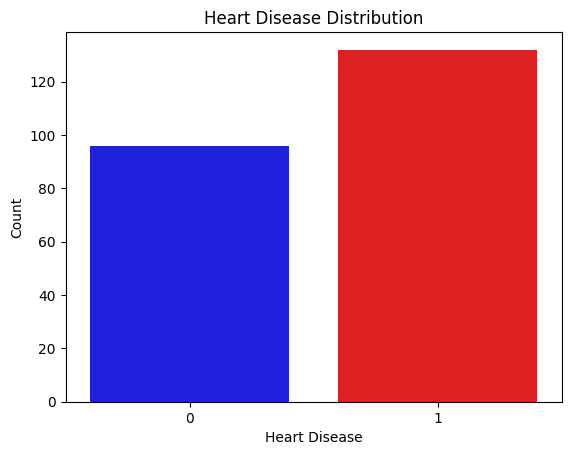

In [91]:
custom_palette = {'1': 'red', '0': 'blue'}

# checking the class imbalance 
sns.countplot(x='Heart Disease', data=df, palette=custom_palette)
plt.title('Heart Disease Distribution')
plt.ylabel('Count')
plt.show()

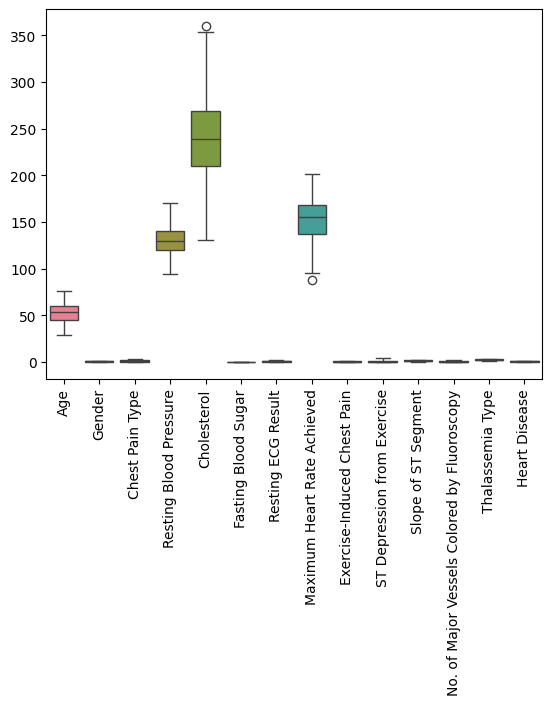

In [ ]:
# boxplt (outliers)
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

Univariate Analysis

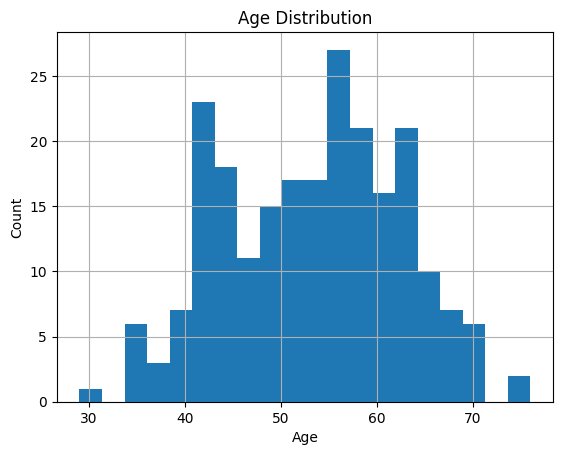

In [110]:
df['Age'].hist(bins=20)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

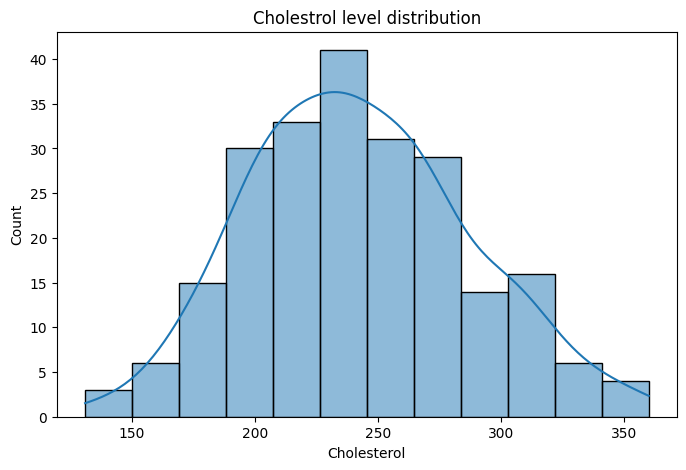

In [94]:
plt.figure(figsize=(8,5))
sns.histplot(data=df ,x='Cholesterol', kde='True' ,palette='ccolwarm')
plt.title('Cholestrol level distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

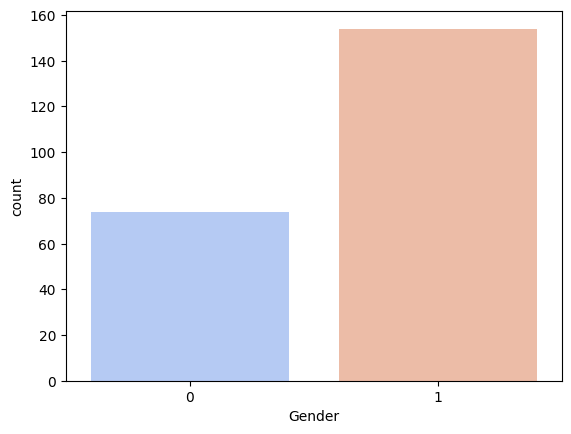

In [95]:
sns.countplot(x='Gender', data=df, palette='coolwarm')
plt.show()

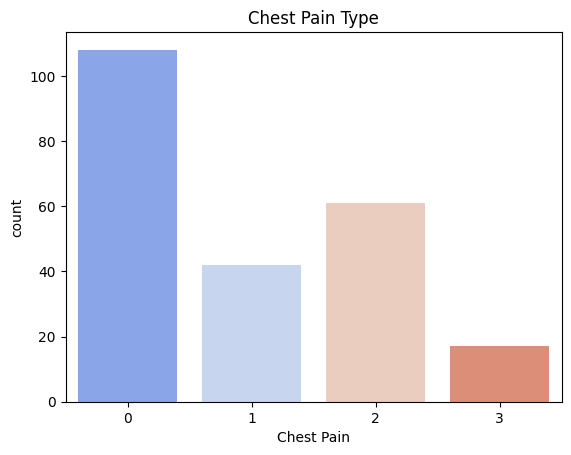

In [96]:
sns.countplot(x='Chest Pain Type', data=df, palette='coolwarm')
plt.title('Chest Pain Type')
plt.xlabel('Chest Pain')
plt.show()

Bivariate Analysis

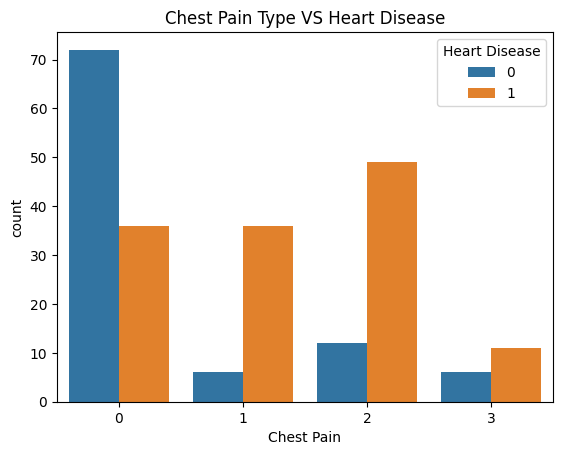

In [97]:
sns.countplot(x='Chest Pain Type', hue='Heart Disease', data=df)
plt.title('Chest Pain Type VS Heart Disease')
plt.xlabel('Chest Pain')
plt.show()

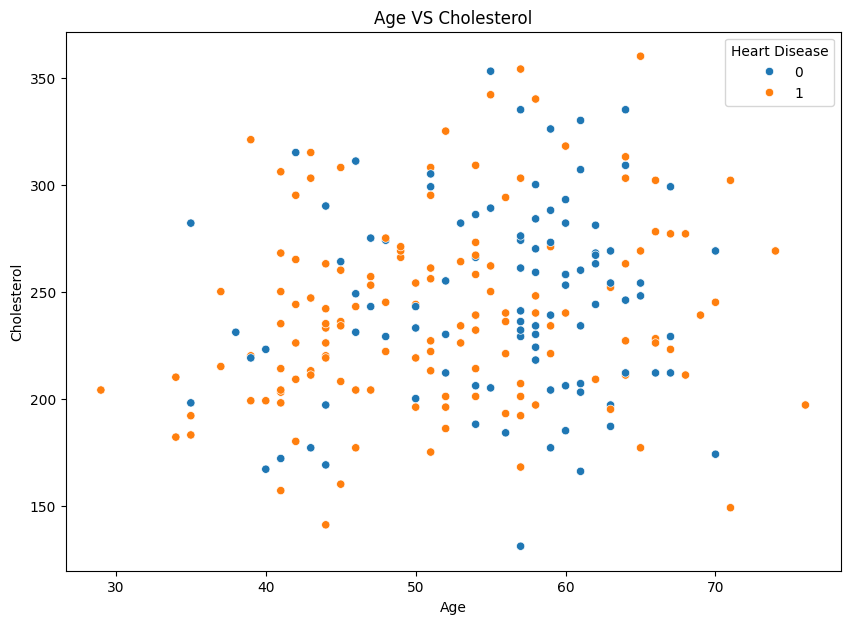

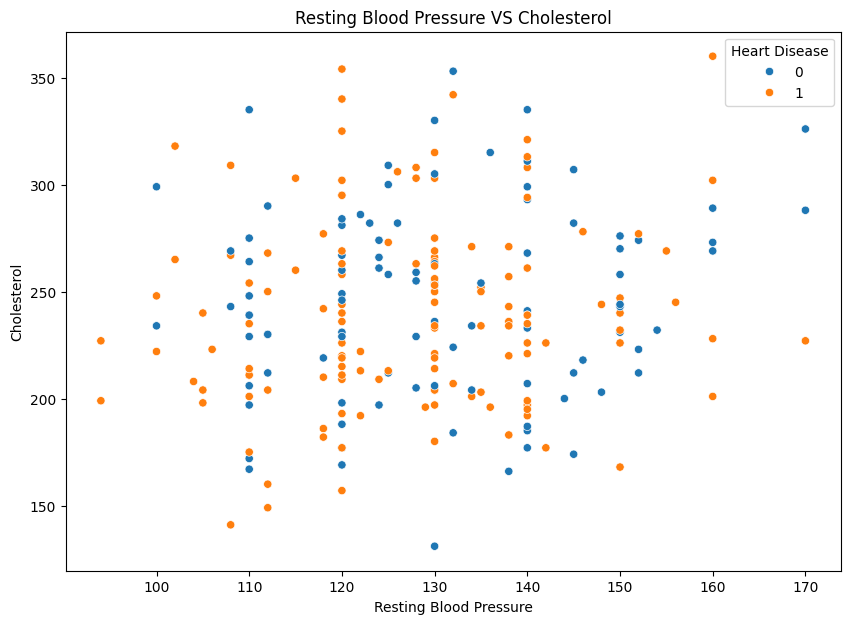

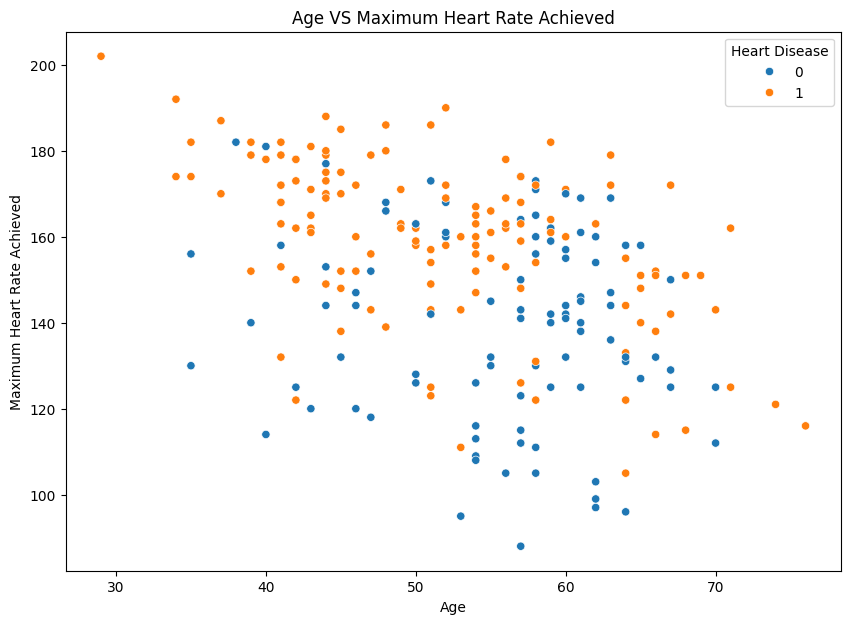

In [98]:
scatter_plots = [
    ('Age', 'Cholesterol'),
    ('Resting Blood Pressure', 'Cholesterol'),
    ('Age', 'Maximum Heart Rate Achieved')
]

for x, y in scatter_plots:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=x, y=y, hue='Heart Disease', data=df)
    plt.title(f'{x} VS {y}')
    plt.xlabel(f'{x}')
    plt.ylabel(f'{y}')
    plt.show()

# Encoding

In [99]:
# using one-hot encoding
cols_to_encode = ['Chest Pain Type', 'Resting ECG Result', 'Slope of ST Segment', 'Thalassemia Type']
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

# Feature Elimination

In [100]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(df_encoded)
low_variance_features = df_encoded.columns[~selector.get_support()]
print("Low variance columns:", low_variance_features)


Low variance columns: Index(['Fasting Blood Sugar', 'Resting ECG Result_2'], dtype='object')


In [101]:
x_eliminate = df_encoded.drop(columns=low_variance_features)
y = df['Heart Disease']

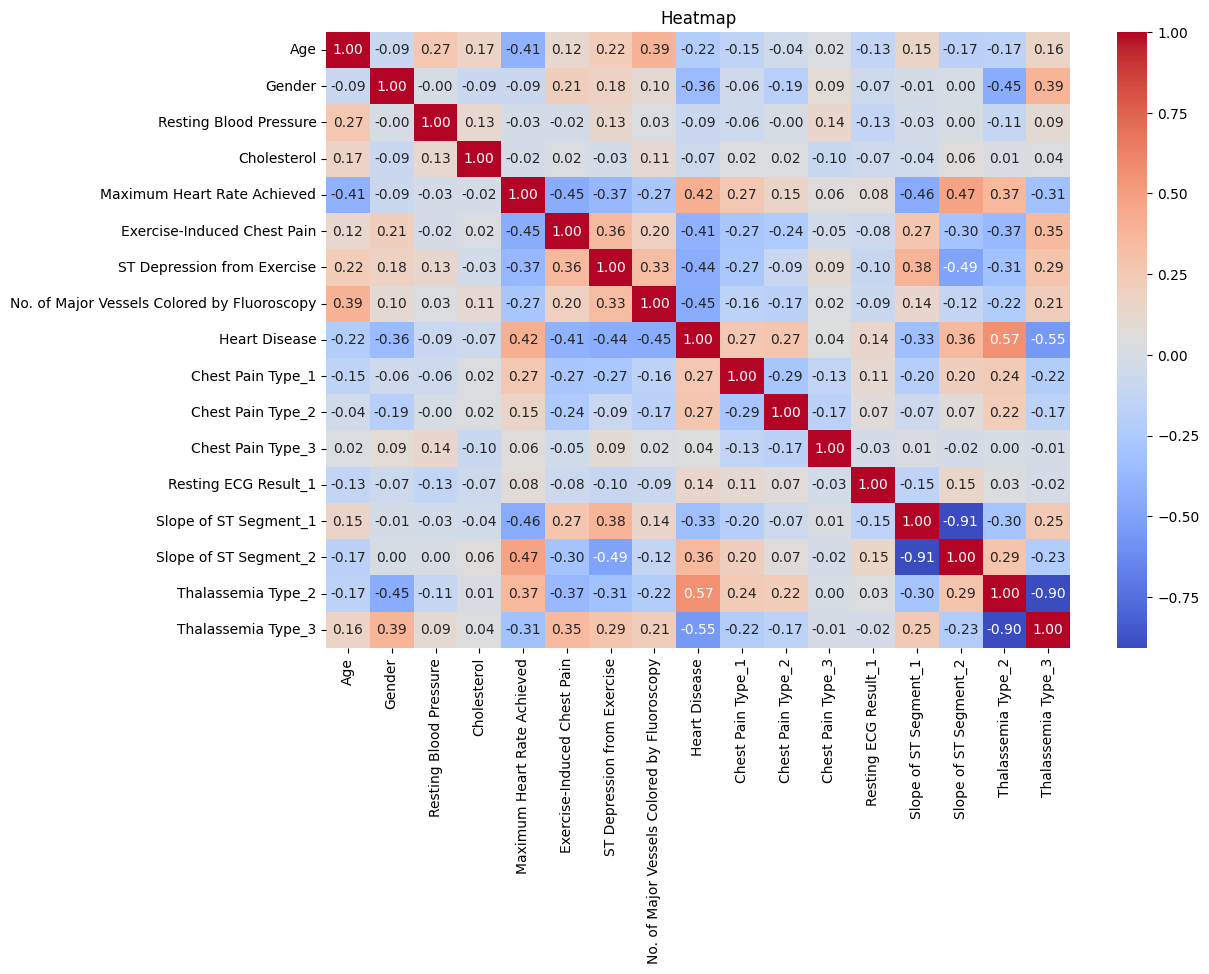

In [102]:
plt.figure(figsize=(12, 8))
sns.heatmap(x_eliminate.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap')
plt.show()

# Spliting, Scaling and Model Training

In [ ]:
x_reduced = x_eliminate.drop('Heart Disease', axis=1)
y = df_encoded['Heart Disease']

# spliting the features in the train, test set 
x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Logistic Regression

In [104]:
log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)
y_predict_log = log_model.predict(x_test_scaled)

print("Logistic Regression")
print("Accuracy: ", accuracy_score(y_test, y_predict_log))
print("\nClassification Report:\n", classification_report(y_test, y_predict_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predict_log))

Logistic Regression
Accuracy:  0.8695652173913043

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.93      0.87      0.90        31

    accuracy                           0.87        46
   macro avg       0.85      0.87      0.86        46
weighted avg       0.88      0.87      0.87        46


Confusion Matrix:
 [[13  2]
 [ 4 27]]


Random Forest

In [113]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_scaled, y_train)
y_predict_rf = rf_model.predict(x_test_scaled)

print("Random Forest")
print("Accuracy: ", accuracy_score(y_test, y_predict_rf))
print("\nClassification Report:\n", classification_report(y_test, y_predict_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predict_rf))

Random Forest
Accuracy:  0.9130434782608695

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.94      0.94      0.94        31

    accuracy                           0.91        46
   macro avg       0.90      0.90      0.90        46
weighted avg       0.91      0.91      0.91        46


Confusion Matrix:
 [[13  2]
 [ 2 29]]


Decision Tree

In [106]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_scaled, y_train)
y_predict_dt = dt_model.predict(x_test_scaled)

print("Decision Tree")
print("Accuracy: ", accuracy_score(y_test, y_predict_log))
print("\nClassification Report:\n", classification_report(y_test, y_predict_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_predict_log))

Decision Tree
Accuracy:  0.8695652173913043

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.93      0.87      0.90        31

    accuracy                           0.87        46
   macro avg       0.85      0.87      0.86        46
weighted avg       0.88      0.87      0.87        46


Confusion Matrix:
 [[13  2]
 [ 4 27]]


In [ ]:
def predict_heart_disease(input_data):

    # converting input to dataframe if it's a dictionary
    if isinstance(input_data, dict):
        input_df = pd.DataFrame([input_data])
    else:
        input_df = input_data.copy()
    
    # encoding same as training
    input_encoded = pd.get_dummies(input_df)
    
    # making sure all required columns are present 
    for col in x_reduced.columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0
    
    # same column order as for the training
    input_encoded = input_encoded[x_reduced.columns]
    
    # Scale input
    input_scaled = scaler.transform(input_encoded)
    
    # making predictions using random forest model 
    prediction = rf_model.predict(input_scaled)
    
    return "Has Heart Disease" if prediction[0] == 1 else "No Heart Disease"


# Prediction Using Random Forest

In [108]:
sample_input = {
    'Age': 55,
    'Gender': 1,
    'Resting Blood Pressure': 140,
    'Cholesterol': 240,
    'Maximum Heart Rate Achieved': 160,
    'Exercise-Induced Chest Pain': 0,
    'ST Depression from Exercise': 1.2,
    'Chest Pain Type_1': 0, 'Chest Pain Type_2': 1, 'Chest Pain Type_3': 0,
    'Resting ECG Result_1': 0,
    'Slope of ST Segment_1': 0, 'Slope of ST Segment_2': 1,
    'Thalassemia Type_1': 0, 'Thalassemia Type_2': 1
}

result = predict_heart_disease(sample_input)
print(result)


Has Heart Disease
